### Import required libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
with_mask_files = os.listdir(r'C:\Users\Mohamed Makki\Desktop\data\with_mask')
print(with_mask_files[0:5])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']


In [6]:
without_mask_files = os.listdir(r'C:\\Users\\Mohamed Makki\\Desktop\\data\\without_mask')
print(without_mask_files[0:5])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


In [7]:
print(f"Number of images with mask: {len(with_mask_files)}")
print(f"Number of images without mask: {len(without_mask_files)}")

Number of images with mask: 3725
Number of images without mask: 3828


### Creating Labels for two class of images


- with mask -- 1

- without mask -- 0


In [8]:
# Create the labels

with_mask_labels = [1] * len(with_mask_files)

without_mask_labels = [0] * len(without_mask_files)

In [9]:
print(with_mask_labels[:4])
print(without_mask_labels[:4])

[1, 1, 1, 1]
[0, 0, 0, 0]


In [10]:
labels = with_mask_labels + without_mask_labels
print(labels[:10])
print(labels[-10:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Dispaly the Images


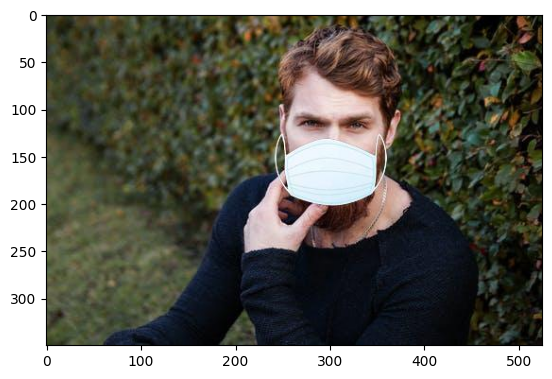

In [11]:
# Dispaly with mask images
img = mpimg.imread(r'C:\Users\Mohamed Makki\Desktop\data\with_mask\with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.imshow(img)


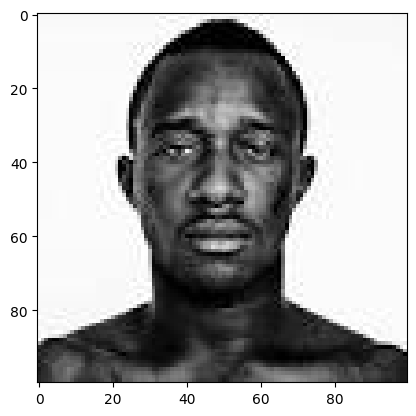

In [12]:
# Dispaly with out mask images
img = mpimg.imread(r'C:\Users\Mohamed Makki\Desktop\data\without_mask\without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.imshow(img)

### Image Processing


**Resize the images**

**Convert the images to numpy arrays**


In [13]:
# Convert the images to numpy arrays
with_mask_path = r'C:\Users\Mohamed Makki\Desktop\data\with_mask'

data = []

for img in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img))
    image = image.resize((128,128))
    image = image.convert('RGB')
    data.append(np.array(image))


without_mask_path = r'C:\Users\Mohamed Makki\Desktop\data\without_mask'

for img in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img))
    image = image.resize((128,128))
    image = image.convert('RGB')
    data.append(np.array(image))

c:\Users\Mohamed Makki\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
type(data)

list

In [15]:
len(data)

7553

In [16]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
# Converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


### Train Test Split


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
# Scaling the data
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [23]:
X_train_scaled[0]

array([[[0.16862745, 0.0627451 , 0.04705882],
        [0.17647059, 0.06666667, 0.04705882],
        [0.18431373, 0.07843137, 0.05098039],
        ...,
        [0.17647059, 0.11372549, 0.1254902 ],
        [0.17254902, 0.11372549, 0.1254902 ],
        [0.17254902, 0.11372549, 0.1254902 ]],

       [[0.18431373, 0.06666667, 0.05098039],
        [0.19607843, 0.0745098 , 0.05882353],
        [0.21960784, 0.09803922, 0.07843137],
        ...,
        [0.17647059, 0.11764706, 0.12941176],
        [0.17254902, 0.11372549, 0.1254902 ],
        [0.17254902, 0.11372549, 0.1254902 ]],

       [[0.21568627, 0.08627451, 0.0627451 ],
        [0.23529412, 0.10196078, 0.07843137],
        [0.2745098 , 0.14117647, 0.11764706],
        ...,
        [0.17254902, 0.11372549, 0.1254902 ],
        [0.16862745, 0.10980392, 0.12156863],
        [0.16862745, 0.10980392, 0.12156863]],

       ...,

       [[0.5254902 , 0.7372549 , 0.6627451 ],
        [0.51372549, 0.73333333, 0.65098039],
        [0.48627451, 0

### Building a Convolutional Neural Networks (CNN)


In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 2

model = keras.Sequential([

    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_of_classes, activation='sigmoid')
])

c:\Users\Mohamed Makki\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the Neural Networks
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# Training the Neural Networks 
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 165ms/step - accuracy: 0.6945 - loss: 0.5718 - val_accuracy: 0.9157 - val_loss: 0.2406
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.8735 - loss: 0.3194 - val_accuracy: 0.9190 - val_loss: 0.2109
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - accuracy: 0.8962 - loss: 0.2611 - val_accuracy: 0.9240 - val_loss: 0.1737
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 154ms/step - accuracy: 0.9199 - loss: 0.2169 - val_accuracy: 0.9455 - val_loss: 0.1398
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - accuracy: 0.9458 - loss: 0.1537 - val_accuracy: 0.9537 - val_loss: 0.1474
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 160ms/step - accuracy: 0.9473 - loss: 0.1512 - val_accuracy: 0.9636 - val_loss: 0.1198
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - accuracy: 0.9557 - loss: 0.1321 - val_accuracy: 0.9537 - val_loss: 0.1321
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.9657 - loss: 0

### Model Evaluation


In [30]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9568 - loss: 0.1706
Test Accuracy: 0.9576439261436462
Test Loss: 0.15469063818454742


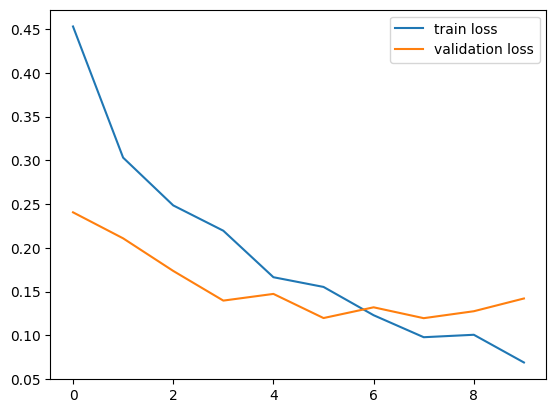

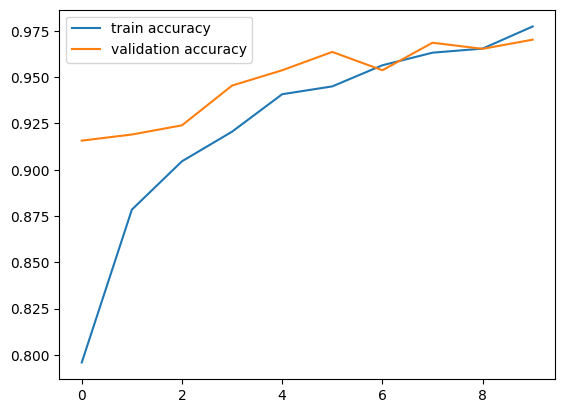

In [31]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

### Predictive System


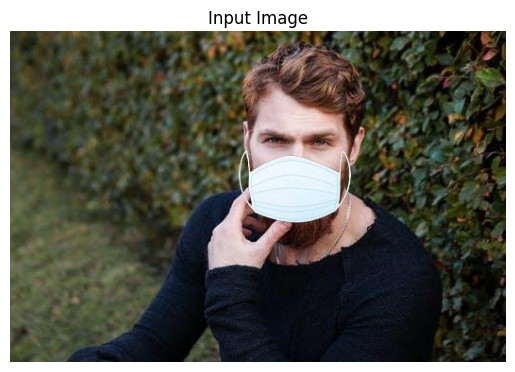

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted label: 1
✅ Person is wearing mask


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# request image path from user
input_image_path = input("Enter the path of the image: ")

# read image
input_image = cv2.imread(input_image_path)

# check if the image is read correctly
if input_image is None:
    print("⚠️ Error: Could not read the image. Check the path or file format.")
else:
    # convert from BGR → RGB
    input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # show the image
    plt.imshow(input_image_rgb)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()

    # Resize
    input_image = cv2.resize(input_image, (128, 128))

    # Normalize
    input_image = input_image / 255.0

    # Reshape to fit model input
    input_image = np.reshape(input_image, (1, 128, 128, 3))

    # Predict
    pred = model.predict(input_image)
    input_pred_label = np.argmax(pred)

    print("Predicted label:", input_pred_label)

    if input_pred_label == 1:
        print("✅ Person is wearing mask")
    else:
        print("❌ Person is not wearing mask")
